<a href="https://colab.research.google.com/github/VemPrava/FMML_Projects_and_Labs/blob/main/Pravallika_assignment_FMML_M1L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming data using linear algebra

FMML Module 1, Lab 4

Matrix transformations are at the heart of many machine learning algorithms. In this lab, we'll visualize the effect of some simple transformations on a unit square and then visualize it using the MNIST dataset. We also see what data normalization means and how it can help in improving the accuracy of machine learning models.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
# You don't need to understand these functions


def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    # plot lines parallel to the x axis
    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    # plot  lines parallel to the y axis
    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    lim2 = X.max()
    lim1 = X.min()
    return fig, ax

## Matrix transformations on data

Note: This lab involves a lot of matrix operations. If you are not familiar with them, please go through the resources given in class before proceeding. You can also review Khan Academy's excellent linear algebra [resources](https://www.khanacademy.org/math/linear-algebra/matrix-transformations).

A 2D coordinate system is defined by its basis vectors, i and j. Any point in this 2D space can be represented as a linear combination of these basis vectors. For example, the point (a,b) can be represented as:

$$\begin{equation}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\} = a\left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\} + b\left\{  \begin{aligned}0 \\ 1 \end{aligned} \right\} = a\hat{i} + b\hat{j}
\end{equation}$$

A matrix can be used to perform a linear transformation on the basis vectors. The new basis vectors $\hat{i}$ and $\hat{j}$ are given by the product of the matrix and the basis vectors of the standard coordinate system.

In the standard coordinate system (Let us call it T0), the basis vectors are

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 1\end{aligned} \right\} \end{equation}$$

We can use any two vectors as basis vectors for a new coordinate system as long as they are not colinear. For example, let us call this new coordinate system T1:

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ -1 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 2 \end{aligned} \right\} \end{equation}$$

Suppose we have a point [a,b] in the T1 coordinate system. Its representation in the standard system T0 can be obtained by the following matrix multiplication:

$$ \begin{equation}
\left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
\left\{  \begin{aligned}&1 & 0 \\ -&1 & 2 \end{aligned} \right\}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\}
\end{equation}$$
where the columns of the matrix are the basis vectors of T1.


Let us see this in action:


In [3]:
T0 = np.array([[1, 0], [0, 1]])
T1 = np.array([[1, 0], [-1, 2]])

data1 = np.array([5, 4])  # the data in T1 coordinate system
data0 = np.matmul(T1, data1)  # the data in T0 coordinate system

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [5 3]
Data in T1 =  [5 4]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines.

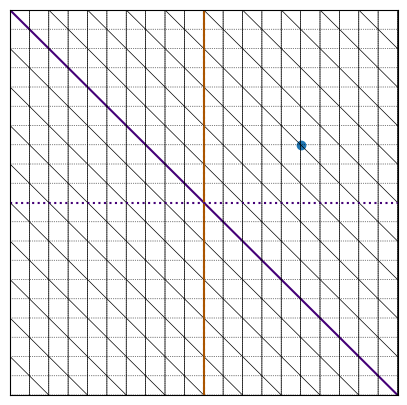

In [4]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Look at the coordinates of the blue dot. In T0 (dotted lines), the position is [5,3] where it is [5,4] in T1. Feel free to experiment with different data points and coordinate systems.

Remember that we can achieve the same thing by post-multiplying the transpose of the transformation matrix to the data. This will come in handy when transforming multiple data points at once:

In [5]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[5 3]
[5 3]


Why is transforming data useful? Data transformations cause the distance between data points to change. This will affect distance-based algorithms such as nearest neighbour

In [6]:
# let us define 3 points in T1
A1 = np.array([3, 3])
B1 = np.array([2, -5])
C1 = np.array([1, -1])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)


def dist(a, b):
    # function to calculate Euclidean distance between two points
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())


# distance between the points in T1
print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")
# distnace between the points in T0
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.47213595499958

Distance between A and B in T0 =  15.033296378372908
Distance between B and C in T0 =  9.055385138137417
Distance between A and C in T0 =  6.324555320336759


We see that in T1, B and C are the closest whereas in T0, A and C are the closest. These kinds of changes will affect the predictions returned by the nearest neighbour algorithm.

## Transformations on MNIST

Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. We will then transform the data using a transformation matrix and visualize the data in the new coordinate system. We will also see how normalization can help in improving the accuracy of the model. We will reuse previous labs code for this.

In [7]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)


def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        # for every row, add up all the rows above it.
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    """
    This function takes in a binary image and returns the pixels that are holes in the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the holes are filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole


def getHullPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the convex hull of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the convex hull is filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    return hull


def minus(a, b):
    """
    This function takes in two binary images and returns the difference between the two images
    """
    return a & ~b


def getBoundaryPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the boundary of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the boundary is filled in
    """
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [8]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 500th sample
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
# test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

Let us plot the samples and see what they look like:

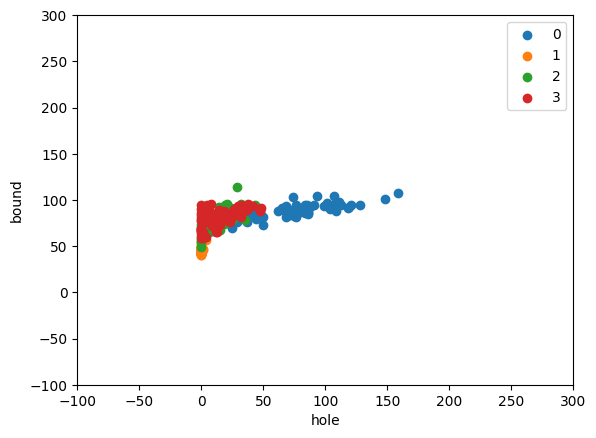

In [10]:
# fix limits of x and y axis so that we can see what is going on
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

Check the baseline accuracy on the test set:

In [11]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 76.19047619047619 % for 4 classes


Let us try transforming the features and checking their accuracy. The intuition to using the transformation matrix is to find the basis vectors of the dataset and transform the data to a new coordinate system where the basis vectors are orthogonal. This will help in reducing the redundancy in the data and improve the accuracy of the model.

In [12]:
transform = np.array([[0.5, -0.5], [0, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
# whatever transform we are applying to the training set should be applied to the test set also
test_feats_t = np.matmul(test_feats, transform)

[[ 0.5 -0.5]
 [ 0.   2.5]]


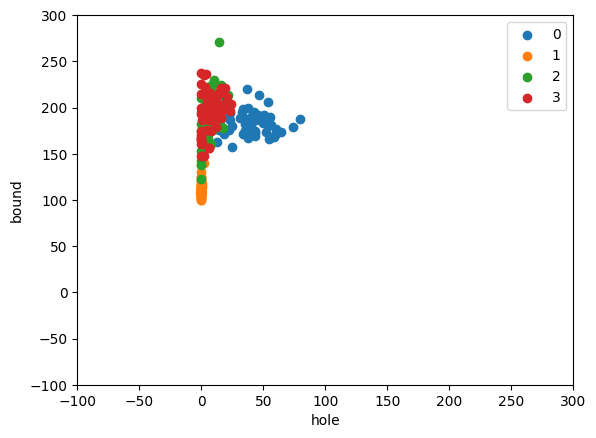

In [13]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [14]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 80.95238095238095 % for 4 classes


## Questions:
1. Experiment with different transformation matrices and check the accuracy
2. Will the same transform used for these two features also work for other features?

> Exercise: Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.

Experimenting with different transformation matrices

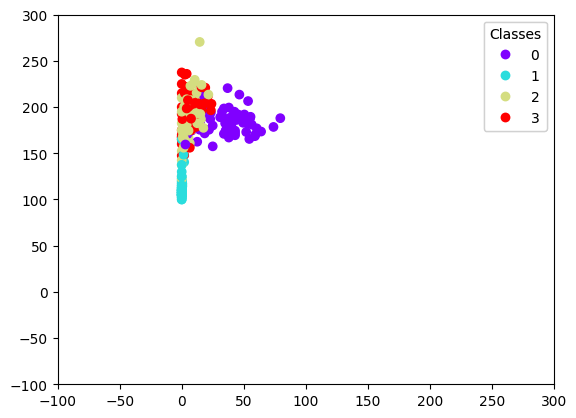

Accuracy with transform:
[[ 0.5 -0.5]
 [ 0.   2.5]]
 is 80.95% for 4 classes


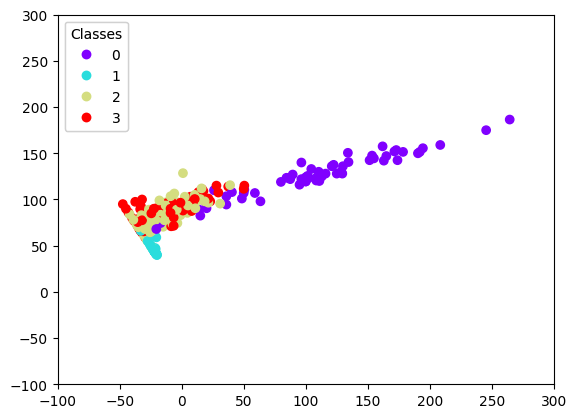

Accuracy with transform:
[[ 2.   0.5]
 [-0.5  1. ]]
 is 76.19% for 4 classes


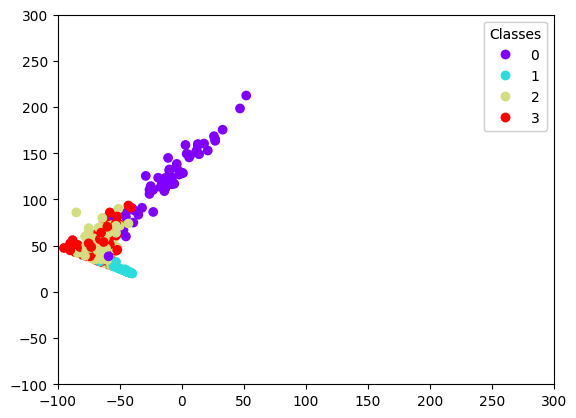

Accuracy with transform:
[[ 1.   1. ]
 [-1.   0.5]]
 is 76.19% for 4 classes


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Assuming the previously defined functions are available

# First, we'll define a plot function to visualize data
def plotData(feats, labels):
    fig, ax = plt.subplots()
    scatter = ax.scatter(feats[:, 0], feats[:, 1], c=labels, cmap="rainbow")
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    return fig, ax

# Loading dataset and extracting relevant features
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# Subsetting data
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

# Feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])

# Creating feature sets
train_feats = np.vstack((train_hole, train_bound)).transpose()
test_feats = np.vstack((test_hole, test_bound)).transpose()

# Define transformation matrices
transform1 = np.array([[0.5, -0.5], [0, 2.5]])
transform2 = np.array([[2, 0.5], [-0.5, 1]])
transform3 = np.array([[1, 1], [-1, 0.5]])

# Function to test different transformations
def test_transform(transform, train_feats, test_feats):
    train_feats_t = np.matmul(train_feats, transform)
    test_feats_t = np.matmul(test_feats, transform)

    # Plot transformed data
    fig, ax = plotData(train_feats_t, train_y)
    ax.set_xlim([-100, 300])
    ax.set_ylim([-100, 300])
    plt.show()

    # Predict and calculate accuracy
    test_pred = NN(train_feats_t, train_y, test_feats_t)
    acc = Accuracy(test_y, test_pred)
    print(f"Accuracy with transform:\n{transform}\n is {acc*100:.2f}% for {nclasses} classes")
    return acc

# Testing transformations
acc1 = test_transform(transform1, train_feats, test_feats)
acc2 = test_transform(transform2, train_feats, test_feats)
acc3 = test_transform(transform3, train_feats, test_feats)


Each transformation matrix reshapes the feature space by altering the relationship between the hole and boundary features. The maximum accuracy is found to be for the combination of: transform=[[0.5, -0.5],[0.0, 2.5]] as 80%.

2. Instead of using both the hole and boundary features together, we can explore using combinations of two features at a time and compare their effects on accuracy.

Testing hole feature only:


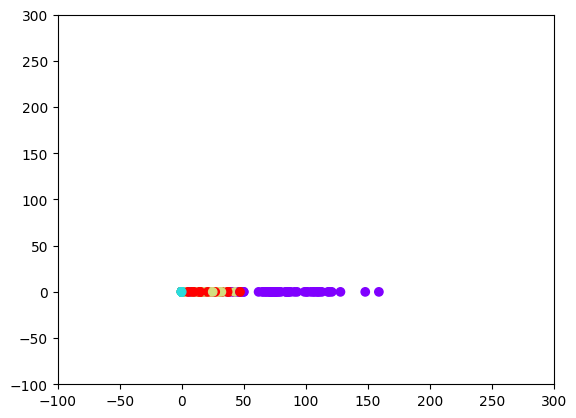

Accuracy with 1 feature(s): 61.90%
Testing boundary feature only:


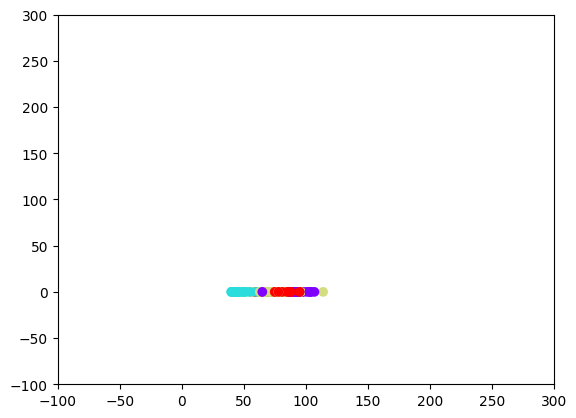

Accuracy with 1 feature(s): 59.52%
Testing hole and boundary features together:


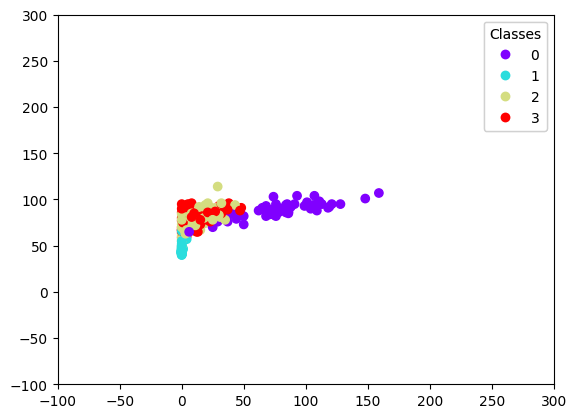

Accuracy with 2 feature(s): 76.19%


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Assuming getHolePixels, getBoundaryPixels, NN, Accuracy are defined previously

# Load dataset and normalize
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0

nclasses = 4  # Number of classes to consider
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# Subset of the data (to reduce runtime for testing)
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

# Feature extraction: hole and boundary pixels
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])

train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])

# Function to classify and visualize the features
def plot_and_classify(train_feats, test_feats, num_features):
    # Identity matrix for transformation
    transform = np.eye(num_features)

    # Apply transformation (though here, it's the identity, so no real change)
    train_feats_t = np.matmul(train_feats, transform)
    test_feats_t = np.matmul(test_feats, transform)

    # Plot transformed data
    if num_features == 1: # Check if the data is one dimensional
        fig, ax = plt.subplots()
        scatter = ax.scatter(train_feats_t, np.zeros_like(train_feats_t), c=train_y, cmap="rainbow") # If one dimensional plot against an array of zeros
    else:
        fig, ax = plotData(train_feats_t, train_y)
    ax.set_xlim([-100, 300])
    ax.set_ylim([-100, 300])
    plt.show()

    # Perform nearest neighbor classification and calculate accuracy
    test_pred = NN(train_feats_t, train_y, test_feats_t)
    acc = Accuracy(test_y, test_pred)
    print(f"Accuracy with {num_features} feature(s): {acc*100:.2f}%")
    return acc

# Experiment with different feature combinations

# Option 1: Use only the hole feature
train_feats_1 = train_hole.reshape(-1, 1)
test_feats_1 = test_hole.reshape(-1, 1)
print("Testing hole feature only:")
acc_hole = plot_and_classify(train_feats_1, test_feats_1, 1)

# Option 2: Use only the boundary feature
train_feats_2 = train_bound.reshape(-1, 1)
test_feats_2 = test_bound.reshape(-1, 1)
print("Testing boundary feature only:")
acc_bound = plot_and_classify(train_feats_2, test_feats_2, 1)

# Option 3: Use both features (hole and boundary features )
train_feats_3 = np.hstack((train_feats_1, train_feats_2))  # Horizontally stack features
test_feats_3 = np.hstack((test_feats_1, test_feats_2))
print("Testing hole and boundary features together:")
acc_combined = plot_and_classify(train_feats_3, test_feats_3, 2)


Using only the hole feature: 61.9% accuracy
Using only the boundary feature: 59.52% accuracy
Using both hole and boundary features together: 76.19% accuracy.
This interprets that the accuracy increased when both the hole and boundary features thus, depicting that combination of feature gives the best accuracy.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Assuming the previously defined functions are available (getHolePixels, getBoundaryPixels, getHullPixels, NN, Accuracy, plotData)

# Loading dataset and extracting relevant features
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# Subsetting data
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

# Feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])

train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])

train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull = np.array([getHullPixels(i).sum() for i in test_X])

train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

# Defining function to test feature combinations
def test_feature_combination(features_train, features_test, feature_names):
    """
    Test combinations of features to find the one with the best accuracy.

    features_train: list of training feature arrays
    features_test: list of test feature arrays
    feature_names: list of feature names (for tracking)
    """
    train_feats = np.vstack(features_train).transpose()
    test_feats = np.vstack(features_test).transpose()

    # Test with nearest neighbor algorithm
    test_pred = NN(train_feats, train_y, test_feats)
    acc = Accuracy(test_y, test_pred)

    print(f"Accuracy using features {feature_names}: {acc*100:.2f}%")
    return acc

# Combinations of 2 features at a time
features_list = [train_hole, train_bound, train_hull, train_sum]
test_features_list = [test_hole, test_bound, test_hull, test_sum]
feature_names = ["hole", "boundary", "hull", "sum"]

# Test different pairs of features
for i in range(len(features_list)):
    for j in range(i+1, len(features_list)):
        # Select two features
        selected_features_train = [features_list[i], features_list[j]]
        selected_features_test = [test_features_list[i], test_features_list[j]]
        selected_names = [feature_names[i], feature_names[j]]

        # Test the combination
        acc = test_feature_combination(selected_features_train, selected_features_test, selected_names)


Accuracy using features ['hole', 'boundary']: 76.19%
Accuracy using features ['hole', 'hull']: 73.81%
Accuracy using features ['hole', 'sum']: 69.05%
Accuracy using features ['boundary', 'hull']: 69.05%
Accuracy using features ['boundary', 'sum']: 64.29%
Accuracy using features ['hull', 'sum']: 66.67%


In [25]:
# Combinations of all 4 features: hole, boundary, hull, and sum
features_list = [train_hole, train_bound, train_hull, train_sum]
test_features_list = [test_hole, test_bound, test_hull, test_sum]
feature_names = ["hole", "boundary", "hull", "sum"]

# Testing all four features together
print("Testing all 4 features together:")
acc_all = test_feature_combination(features_list, test_features_list, feature_names)

Testing all 4 features together:
Accuracy using features ['hole', 'boundary', 'hull', 'sum']: 71.43%


Yes, it is possible. As demonstrated in the results, combining all four features does not yield the highest accuracy. In fact, the best accuracy was achieved when only two features were used: 'hole' and 'boundary'. This suggests that adding more features may not always help and can sometimes hurt performance. The reasons could include:

Feature Redundancy: Some features may provide similar information, leading to overlap and diminishing returns.
Noise Introduction: Some features might add irrelevant or noisy data that doesn't contribute to better classification.

By testing combinations of only two features,  the combination of 'hole' and 'boundary' provides the best result at 76.19% accuracy.

This combination probably works well because:

Hole Feature: Captures information about the internal structure of the digit, such as enclosed areas (holes) which are important for distinguishing certain classes.
Boundary Feature: Represents the outline of the digit, which is crucial for defining its shape and differentiating similar digits.

Assignment answer= The analysis confirms that adding all four features at once is not the best strategy for this particular dataset. Instead, a more focused approach using two carefully chosen features, such as 'hole' and 'boundary', provides the highest accuracy. Therefore, the best strategy is to experiment with feature combinations, as adding more features can sometimes dilute useful information, rather than improving performance.

Adding few features work better due to many reasons that may include:

Overfitting Risk with More Features: Adding too many features can lead to overfitting where the model tries to memorize the training data instead of generalizing well to new data. This results in lower accuracy on unseen test data.

Higher Dimensionality: More features can increase the complexity of the model, making it harder to find the optimal decision boundary.

Best Feature Pairing: The best feature pair ('hole' and 'boundary') likely captures the most essential information for distinguishing between the first four MNIST digits (0-3).

# Data normalization

Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales.

Three commonly used feature scaling techniques are rescaling, mean normalization and z-score normalization. Here, we will talk about the simplest one: rescaling.

$$\begin{equation}
x' = \frac {x -min(x)} { max(x) - min(x)}
\end{equation}$$



For more information, see [this page](https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02).

In [ ]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set.

In [ ]:
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

Let us plot the rescaled features:

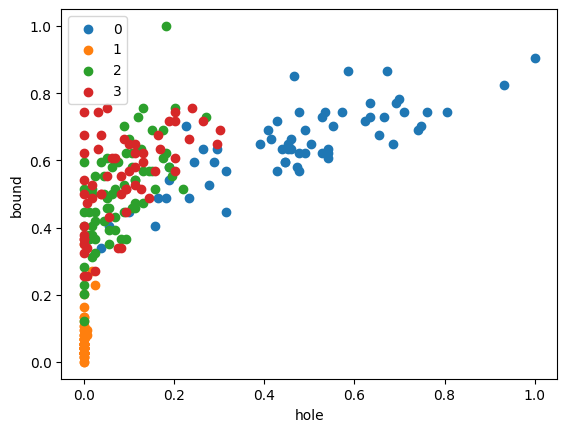

In [ ]:
fig, ax = plotData(train_feats_rescaled, train_y)

This type of rescaling makes all the features between 0 and 1.

Let us calculate the accuracy obtained by this transform:

In [ ]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform:", acc*100, "%")

Accuracy after transform: 80.95238095238095 %


All 2D linear transformations can be repreented by a transformation matrix. So what is the matrix associated with the rescaling function? Actually, we cannot represent rescaling with a matrix multiplication, because it is not a linear transform. Rescaling involves shifting the origin of the data, which is not allowed under linear transformations.

We can represent rescaling as a matrix multiplication followed by a vector addition. Let our first feature vector be called X and second feature vector be called Y. Suppose we want to rescale a data point [a,b]

$$ \begin{equation}
 \left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
 \left\{  \begin{aligned} \frac{a - min(X)}{max(X) - min(X)} \\ \frac{b - min(Y)}{max(Y) - min(Y)} \end{aligned} \right\} =
 \left\{  \begin{aligned}&\frac{1}{max(X)-min(X)} &0\\ &0 &\frac{1}{max(Y)-min(Y)} \end{aligned}
 \right\}\left\{  \begin{aligned}a \\ b \end{aligned} \right\} +
 \left\{  \begin{aligned} \frac{ -min(X)}{max(X) - min(X)} \\ \frac{-min(Y)}{max(Y) - min(Y)} \end{aligned} \right\}
\end{equation}$$

You can verify this yourself if you wish, though it is not necessary.

